In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import numpy as np
import pandas as pd
import os
import cv2

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf

In [4]:
%time

model = Sequential()

model.add(Conv2D(16,
                 kernel_size = (3,3),
                 input_shape = (28, 28, 3),
                 activation = 'relu',
                 padding = 'same'))

model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(32,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Conv2D(64,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Conv2D(256,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(10,activation='softmax'))

model.summary()

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 16)        64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                          

In [5]:
len(model.layers)

22

In [6]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/cnn_model.h5',
                                              monitor='val_acc',
                                              mode='max',
                                              verbose=1,
                                              save_best_only=True)

In [7]:
%time

optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer =optimizer,
              metrics = ['accuracy'])

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


In [8]:
betw = 'Peach'
df = pd.read_csv('/content/drive/MyDrive/DATASET/Pixel_File_'+betw+'.csv')

In [9]:
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2343,2344,2345,2346,2347,2348,2349,2350,2351,label
0,0,145,141,146,146,142,147,145,141,147,...,85,81,92,78,76,82,79,77,83,0
1,1,127,125,125,122,120,120,113,110,112,...,114,113,117,104,101,110,95,92,101,0
2,2,93,89,94,106,102,107,103,102,106,...,164,161,163,163,160,162,165,162,164,0
3,3,133,123,139,138,127,143,127,120,135,...,88,85,107,72,69,91,65,63,85,0
4,4,146,145,149,142,141,145,150,149,153,...,188,186,186,195,191,189,192,188,187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4462,4462,139,135,147,194,190,202,140,136,148,...,179,173,184,179,173,184,184,178,189,1
4463,4463,97,96,112,97,96,112,99,98,114,...,184,178,189,177,171,182,179,173,184,1
4464,4464,85,77,88,104,96,107,90,84,95,...,141,137,148,132,126,138,128,123,135,1
4465,4465,123,121,140,114,112,131,109,107,126,...,28,27,31,170,162,169,171,163,170,1


In [10]:
df = df.sample(frac = 1)
df = df.drop(columns = 'Unnamed: 0').reset_index()
df = df.drop(columns = 'index')

In [11]:
df

,0,1,2,3,4,5,6,7,8,9,...,2343,2344,2345,2346,2347,2348,2349,2350,2351,label
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,1
1,138,138,144,134,134,140,140,139,149,134,...,144,142,148,148,146,152,149,147,153,0
2,120,119,135,124,120,136,121,117,136,121,...,201,200,210,203,203,209,201,201,207,1
3,172,172,186,179,179,193,179,179,193,177,...,126,122,141,138,135,151,110,107,123,0
4,136,127,124,136,127,124,135,127,127,137,...,92,97,102,128,131,140,42,36,41,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4462,106,104,116,103,101,113,119,117,129,116,...,170,163,170,171,164,171,168,161,168,1
4463,142,140,152,147,145,157,135,131,143,149,...,202,200,204,200,198,204,196,194,200,1
4464,161,154,167,142,135,148,154,150,162,132,...,136,134,146,131,131,143,144,142,148,1
4465,132,130,142,129,127,139,130,130,142,129,...,133,131,143,127,125,137,137,134,146,1


In [12]:
print(len(df))
y = df.label
x = df.drop(columns = ['label'])

4467


In [13]:
print(y)
print(x)

0       1
1       0
2       1
3       0
4       0
       ..
4462    1
4463    1
4464    1
4465    1
4466    0
Name: label, Length: 4467, dtype: int64
        0    1    2    3    4    5    6    7    8    9  ...  2342  2343  2344  \
0     255  255  255  255  255  255  255  255  255  255  ...   255   255   255   
1     138  138  144  134  134  140  140  139  149  134  ...   149   144   142   
2     120  119  135  124  120  136  121  117  136  121  ...   199   201   200   
3     172  172  186  179  179  193  179  179  193  177  ...   133   126   122   
4     136  127  124  136  127  124  135  127  127  137  ...   153    92    97   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
4462  106  104  116  103  101  113  119  117  129  116  ...   167   170   163   
4463  142  140  152  147  145  157  135  131  143  149  ...   200   202   200   
4464  161  154  167  142  135  148  154  150  162  132  ...   166   136   134   
4465  132  130  142  129  127  139  130 

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [15]:
x_train = np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)

In [20]:
from datetime import datetime

start_time = datetime.now()

history = model.fit(x_train,
                    y_train,
                    validation_split=0.1,
                    batch_size = 64,
                    epochs = 30,
                    shuffle=True,
                    callbacks=[callback])

end_time = datetime.now()

print('Duration: {}'.format(end_time - start_time))

Epoch 1/30
42/43 [============================>.] - ETA: 0s - loss: 1.1094 - accuracy: 0.7853

43/43 [==============================] - 5s 118ms/step - loss: 1.1097 - accuracy: 0.7853 - val_loss: 0.9918 - val_accuracy: 0.8833
Epoch 2/30
42/43 [============================>.] - ETA: 0s - loss: 1.0926 - accuracy: 0.7887

43/43 [==============================] - 4s 91ms/step - loss: 1.0922 - accuracy: 0.7886 - val_loss: 0.9702 - val_accuracy: 0.8900
Epoch 3/30
42/43 [============================>.] - ETA: 0s - loss: 1.0855 - accuracy: 0.8021

43/43 [==============================] - 4s 83ms/step - loss: 1.0850 - accuracy: 0.8024 - val_loss: 0.9507 - val_accuracy: 0.8933
Epoch 4/30
42/43 [============================>.] - ETA: 0s - loss: 1.0658 - accuracy: 0.8013

43/43 [==============================] - 4s 89ms/step - loss: 1.0653 - accuracy: 0.8016 - val_loss: 0.9390 - val_accuracy: 0.8900
Epoch 5/30
42/43 [============================>.] - ETA: 0s - loss: 1.0568 - accuracy: 0.8043

43/43 [==============================] - 5s 118ms/step - loss: 1.0570 - accuracy: 0.8035 - val_loss: 0.9260 - val_accuracy: 0.8967
Epoch 6/30
42/43 [============================>.] - ETA: 0s - loss: 1.0476 - accuracy: 0.8088

43/43 [==============================] - 4s 84ms/step - loss: 1.0475 - accuracy: 0.8087 - val_loss: 0.9194 - val_accuracy: 0.8933
Epoch 7/30
42/43 [============================>.] - ETA: 0s - loss: 1.0266 - accuracy: 0.8214

43/43 [==============================] - 4s 85ms/step - loss: 1.0268 - accuracy: 0.8213 - val_loss: 0.9059 - val_accuracy: 0.8967
Epoch 8/30
42/43 [============================>.] - ETA: 0s - loss: 0.9957 - accuracy: 0.8397

43/43 [==============================] - 5s 117ms/step - loss: 0.9960 - accuracy: 0.8388 - val_loss: 0.8877 - val_accuracy: 0.9000
Epoch 9/30
42/43 [============================>.] - ETA: 0s - loss: 0.9963 - accuracy: 0.8300

43/43 [==============================] - 4s 89ms/step - loss: 0.9973 - accuracy: 0.8299 - val_loss: 0.8707 - val_accuracy: 0.9033
Epoch 10/30
42/43 [============================>.] - ETA: 0s - loss: 0.9741 - accuracy: 0.8449

43/43 [==============================] - 4s 83ms/step - loss: 0.9744 - accuracy: 0.8447 - val_loss: 0.8585 - val_accuracy: 0.9033
Epoch 11/30
42/43 [============================>.] - ETA: 0s - loss: 0.9656 - accuracy: 0.8542

43/43 [==============================] - 4s 88ms/step - loss: 0.9649 - accuracy: 0.8544 - val_loss: 0.8492 - val_accuracy: 0.9100
Epoch 12/30
42/43 [============================>.] - ETA: 0s - loss: 0.9654 - accuracy: 0.8516

43/43 [==============================] - 6s 136ms/step - loss: 0.9655 - accuracy: 0.8514 - val_loss: 0.8369 - val_accuracy: 0.9133
Epoch 13/30
42/43 [============================>.] - ETA: 0s - loss: 0.9401 - accuracy: 0.8579

43/43 [==============================] - 4s 84ms/step - loss: 0.9400 - accuracy: 0.8581 - val_loss: 0.8239 - val_accuracy: 0.9200
Epoch 14/30
42/43 [============================>.] - ETA: 0s - loss: 0.9281 - accuracy: 0.8661

43/43 [==============================] - 4s 83ms/step - loss: 0.9282 - accuracy: 0.8659 - val_loss: 0.8143 - val_accuracy: 0.9233
Epoch 15/30
42/43 [============================>.] - ETA: 0s - loss: 0.9147 - accuracy: 0.8705

43/43 [==============================] - 5s 122ms/step - loss: 0.9147 - accuracy: 0.8707 - val_loss: 0.8031 - val_accuracy: 0.9267
Epoch 16/30
42/43 [============================>.] - ETA: 0s - loss: 0.8840 - accuracy: 0.8735

43/43 [==============================] - 4s 83ms/step - loss: 0.8841 - accuracy: 0.8733 - val_loss: 0.7848 - val_accuracy: 0.9267
Epoch 17/30
42/43 [============================>.] - ETA: 0s - loss: 0.8754 - accuracy: 0.8776

43/43 [==============================] - 4s 84ms/step - loss: 0.8749 - accuracy: 0.8778 - val_loss: 0.7753 - val_accuracy: 0.9233
Epoch 18/30
42/43 [============================>.] - ETA: 0s - loss: 0.8666 - accuracy: 0.8828

43/43 [==============================] - 4s 99ms/step - loss: 0.8697 - accuracy: 0.8822 - val_loss: 0.7649 - val_accuracy: 0.9300
Epoch 19/30
42/43 [============================>.] - ETA: 0s - loss: 0.8657 - accuracy: 0.8888

43/43 [==============================] - 5s 106ms/step - loss: 0.8658 - accuracy: 0.8889 - val_loss: 0.7525 - val_accuracy: 0.9333
Epoch 20/30
42/43 [============================>.] - ETA: 0s - loss: 0.8402 - accuracy: 0.8854

43/43 [==============================] - 4s 83ms/step - loss: 0.8396 - accuracy: 0.8856 - val_loss: 0.7428 - val_accuracy: 0.9333
Epoch 21/30
42/43 [============================>.] - ETA: 0s - loss: 0.8320 - accuracy: 0.8906

43/43 [==============================] - 4s 83ms/step - loss: 0.8329 - accuracy: 0.8904 - val_loss: 0.7363 - val_accuracy: 0.9333
Epoch 22/30
42/43 [============================>.] - ETA: 0s - loss: 0.8247 - accuracy: 0.8951

43/43 [==============================] - 5s 125ms/step - loss: 0.8241 - accuracy: 0.8952 - val_loss: 0.7252 - val_accuracy: 0.9367
Epoch 23/30
42/43 [============================>.] - ETA: 0s - loss: 0.8045 - accuracy: 0.9007

43/43 [==============================] - 4s 83ms/step - loss: 0.8046 - accuracy: 0.9004 - val_loss: 0.7131 - val_accuracy: 0.9467
Epoch 24/30
42/43 [============================>.] - ETA: 0s - loss: 0.8126 - accuracy: 0.9007

43/43 [==============================] - 4s 83ms/step - loss: 0.8121 - accuracy: 0.9008 - val_loss: 0.7059 - val_accuracy: 0.9400
Epoch 25/30
42/43 [============================>.] - ETA: 0s - loss: 0.7851 - accuracy: 0.9085

43/43 [==============================] - 4s 100ms/step - loss: 0.7856 - accuracy: 0.9082 - val_loss: 0.6966 - val_accuracy: 0.9467
Epoch 26/30
42/43 [============================>.] - ETA: 0s - loss: 0.7890 - accuracy: 0.9036

43/43 [==============================] - 5s 106ms/step - loss: 0.7894 - accuracy: 0.9034 - val_loss: 0.6841 - val_accuracy: 0.9533
Epoch 27/30
42/43 [============================>.] - ETA: 0s - loss: 0.7661 - accuracy: 0.9077

43/43 [==============================] - 4s 83ms/step - loss: 0.7662 - accuracy: 0.9075 - val_loss: 0.6748 - val_accuracy: 0.9533
Epoch 28/30
42/43 [============================>.] - ETA: 0s - loss: 0.7521 - accuracy: 0.9144

43/43 [==============================] - 4s 84ms/step - loss: 0.7557 - accuracy: 0.9138 - val_loss: 0.6676 - val_accuracy: 0.9533
Epoch 29/30
42/43 [============================>.] - ETA: 0s - loss: 0.7411 - accuracy: 0.9215

43/43 [==============================] - 5s 126ms/step - loss: 0.7413 - accuracy: 0.9212 - val_loss: 0.6593 - val_accuracy: 0.9533
Epoch 30/30
42/43 [============================>.] - ETA: 0s - loss: 0.7328 - accuracy: 0.9159

43/43 [==============================] - 4s 83ms/step - loss: 0.7333 - accuracy: 0.9157 - val_loss: 0.6526 - val_accuracy: 0.9533
Duration: 0:02:21.983136


In [25]:
from datetime import datetime

start_time = datetime.now()

history = model.fit(x_train,
                    y_train,
                    validation_split=0.1,
                    batch_size = 64,
                    epochs = 3,
                    shuffle=True,
                    callbacks=[callback])

end_time = datetime.now()

print('Duration: {}'.format(end_time - start_time))

Epoch 1/3
42/43 [============================>.] - ETA: 0s - loss: 0.6356 - accuracy: 0.9368

43/43 [==============================] - 4s 97ms/step - loss: 0.6351 - accuracy: 0.9368 - val_loss: 0.5688 - val_accuracy: 0.9567
Epoch 2/3
42/43 [============================>.] - ETA: 0s - loss: 0.6302 - accuracy: 0.9390

43/43 [==============================] - 5s 110ms/step - loss: 0.6296 - accuracy: 0.9391 - val_loss: 0.5619 - val_accuracy: 0.9567
Epoch 3/3
42/43 [============================>.] - ETA: 0s - loss: 0.6168 - accuracy: 0.9431

43/43 [==============================] - 4s 84ms/step - loss: 0.6165 - accuracy: 0.9432 - val_loss: 0.5534 - val_accuracy: 0.9567
Duration: 0:00:20.554941


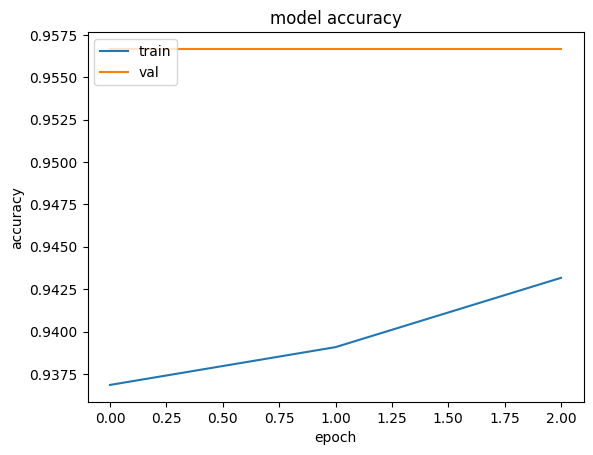

val 0.9566666483879089
min val 0.9566666483879089
acc 0.9431649446487427
mean val 0.9566666483879089


In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])


plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()
print('val',max(history.history['val_accuracy']))
print('min val', min(history.history['val_accuracy']))
print('acc',max(history.history['accuracy']))
print('mean val', sum(history.history['val_accuracy'])/len(history.history['val_accuracy']))

In [27]:
x_test = np.array(x_test, dtype=np.uint8).reshape(-1,28,28,3)

93/93 [==============================] - 1s 11ms/step


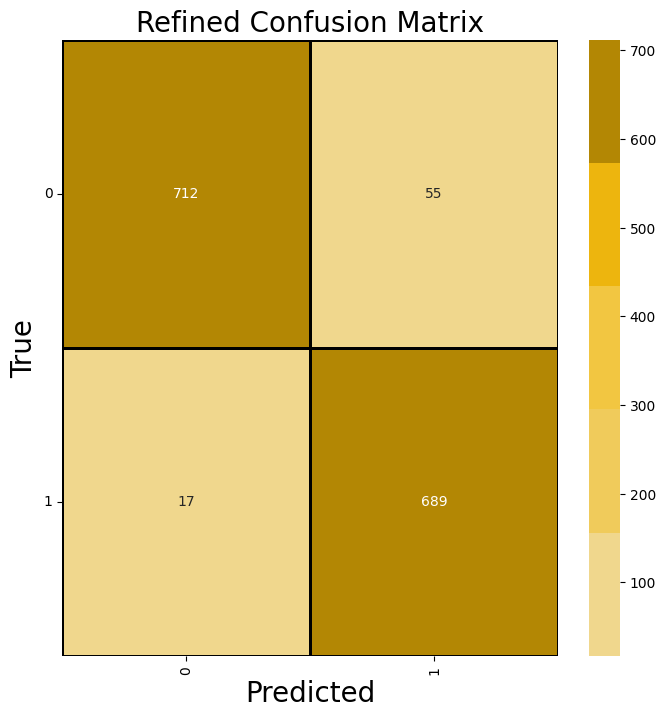

In [32]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cmap_unblended = sns.color_palette(["#f0d78d","#f0cb5b","#f2c641","#edb50e","#b38704"], as_cmap=True)
Pred = model.predict(x_test, batch_size=16)
Pred_Label = np.argmax(Pred, axis=1)
ConfusionM = confusion_matrix(list(y_test), Pred_Label, labels=[0,1])
cm = ConfusionM
targetnames = [0,1]
class_names = targetnames
# Plot confusion matrix
fig = plt.figure(figsize=(8, 8))
ax= plt.subplot()
sns.heatmap(cm,cmap= cmap_unblended, linecolor = 'black' , linewidth = 1 , annot = True, fmt=''); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()

ROC AUC Score=0.951


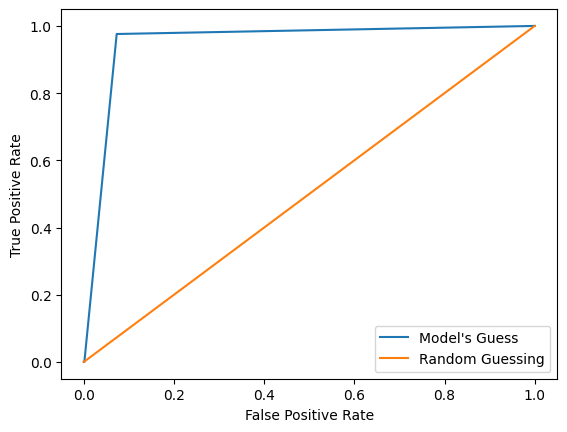

In [33]:
import matplotlib.pyplot as pyplot
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, Pred_Label)
# summarize scores
print('ROC AUC Score=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, Pred_Label)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, label="Model's Guess")
pyplot.plot(ns_fpr, ns_tpr, label='Random Guessing')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [34]:
from sklearn.metrics import classification_report
targetnames = [0,1]
tar = []
for i in targetnames:
  tar.append(str(i))
class_report = classification_report(list(y_test), Pred_Label, labels=[0, 1], target_names=tar)

In [35]:
print(class_report)

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       768
           1       0.93      0.97      0.95       707

   micro avg       0.95      0.95      0.95      1475
   macro avg       0.95      0.95      0.95      1475
weighted avg       0.95      0.95      0.95      1475



In [36]:
model.save_weights('/content/drive/MyDrive/MODELS/'+betw+'/cnn_model_weights.h5')

In [37]:
model.save('/content/drive/MyDrive/MODELS/'+betw+'/cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
